In [1]:
# importing the libraries
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# loading dataset
train = pd.read_csv('pytorch/data/train.csv')
test = pd.read_csv('pytorch/data/test.csv')
sample_submission = pd.read_csv('pytorch/data/sample_submission_I5njJSF.csv')
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [4]:
# random number generator
seed = 128
rng = np.random.RandomState(seed)

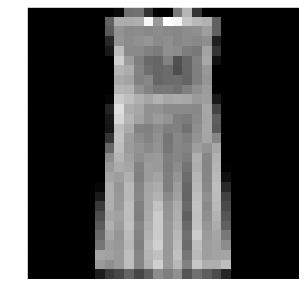

In [5]:
# print an image
img_name = rng.choice(train['id'])
filepath = 'pytorch/data/train/' + str(img_name) + '.png'
img = imread(filepath, as_gray=True)
img = img.astype('float32')
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')

In [6]:
# loading training images
train_img = []
for img_name in train['id']:
    image_path = 'pytorch/data/train/' + str(img_name) + '.png'
    img = imread(image_path, as_gray=True)
    img = img.astype('float32')
    train_img.append(img)
train_x = np.array(train_img)
train_x.shape

(60000, 28, 28)

In [7]:
train_x = train_x/train_x.max()
train_x = train_x.reshape(-1, 28*28).astype('float32')
train_x.shape

(60000, 784)

In [9]:
train_y = train['label'].values

In [10]:
# create validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1, stratify = train_y)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

(((54000, 784), (54000,)), ((6000, 784), (6000,)))

In [11]:
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential
from torch.optim import Adam

In [12]:
# number of neurons in each layer
input_num_units = 28*28
hidden_num_units = 500
output_num_units = 10
# set remaining variables
epochs = 20
learning_rate = 0.0005

In [13]:
# define model
model = Sequential(Linear(input_num_units, hidden_num_units),
                   ReLU(),
                   Linear(hidden_num_units, output_num_units))
# loss function
loss_fn = CrossEntropyLoss()
# define optimization algorithm
optimizer = Adam(model.parameters(), lr=learning_rate)

In [14]:
train_losses = []
val_losses = []
for epoch in range(epochs):
    avg_cost = 0
    
    x, y = Variable(torch.from_numpy(train_x)), Variable(torch.from_numpy(train_y), requires_grad=False)
    x_val, y_val = Variable(torch.from_numpy(val_x)), Variable(torch.from_numpy(val_y), requires_grad=False)
    pred = model(x)
    pred_val = model(x_val)
# get loss
    loss = loss_fn(pred, y)
    loss_val = loss_fn(pred_val, y_val)
    train_losses.append(loss)
    val_losses.append(loss_val)
# perform backpropagation
    loss.backward()
    optimizer.step()
    avg_cost = avg_cost + loss.data
if (epoch%2 != 0):
        print(epoch+1, avg_cost)

20 tensor(0.9655)


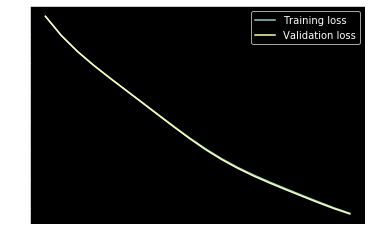

In [15]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [16]:
# get training accuracy
x, y = Variable(torch.from_numpy(train_x)), Variable(torch.from_numpy(train_y), requires_grad=False)
pred = model(x)
final_pred = np.argmax(pred.data.numpy(), axis=1)
accuracy_score(train_y, final_pred)

0.6660925925925926

In [17]:
# get validation accuracy
x, y = Variable(torch.from_numpy(val_x)), Variable(torch.from_numpy(val_y), requires_grad=False)
pred = model(x)
final_pred = np.argmax(pred.data.numpy(), axis=1)
accuracy_score(val_y, final_pred)

0.6706666666666666